In [1]:
#import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv('C:\\Users\\Lenovo\\MachineLearningModels\\bands.csv',header = None)

In [3]:
#check the size of the dataset
df.shape

(541, 40)

In [4]:
#view sample data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [5]:
#supliment column names
col_names = ['timestamp','cylinder_number','customer','job_number','grain_screened',
            'ink_color','proof_on_ctd_ink','blade_mfg','cylinder_division','paper_type',
            'ink_type', 'direct_steam', 'solvent_type', 'type_on_cylinder', 'press_type',
            'press','unit_number','cylinder_size','paper_mill_location','plating_tank',
            'proof_cut','viscosity','caliper','ink_temperature','humifity','roughness',
            'blade_pressure','varnish_pct','press_speed','ink_pct','solvent_pct',
            'ESA_Voltage','ESA_Amperage','wax','hardener','roller_durometer','current_density',
            'anode_space_ratio','chrome_content','band_type']
df.columns = col_names
df.columns

Index(['timestamp', 'cylinder_number', 'customer', 'job_number',
       'grain_screened', 'ink_color', 'proof_on_ctd_ink', 'blade_mfg',
       'cylinder_division', 'paper_type', 'ink_type', 'direct_steam',
       'solvent_type', 'type_on_cylinder', 'press_type', 'press',
       'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank',
       'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity',
       'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 'ink_pct',
       'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener',
       'roller_durometer', 'current_density', 'anode_space_ratio',
       'chrome_content', 'band_type'],
      dtype='object')

In [10]:
df['ESA_Voltage'].value_counts()

0       320
?        56
2        33
4        29
1        24
3        23
5        20
8         9
10        7
6         6
12        4
1.5       2
9         1
0.75      1
4.5       1
16        1
2.5       1
0.5       1
Name: ESA_Voltage, dtype: int64

In [ ]:
#check the data type of the variables
df.info()

In [ ]:
#except Unit_number all other columns are read as object
#convert some of them to integer
#check individual column values 
df['band_type'].head()

In [11]:
num_col = ['timestamp','job_number','press','plating_tank','proof_cut','viscosity','caliper','ink_temperature','humifity',
          'roughness','blade_pressure','varnish_pct','press_speed','ink_pct','solvent_pct','ESA_Voltage','ESA_Amperage',
          'wax','hardener','roller_durometer','current_density','anode_space_ratio','chrome_content']

In [12]:
for col in num_col:
    df[col].replace('?',np.nan,inplace=True)

In [13]:
for col in num_col:
    df[col].replace('band',np.nan,inplace=True)

In [14]:
df.head()

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [15]:
#df['job_number'].astype(float).mean()

for col in num_col:
    mean_value = df[col].astype(float).mean()
    df[col].replace(np.nan,mean_value,inplace=True)

In [16]:
for col in num_col:
    df[col] = df[col].astype(float)

In [17]:
df.head()

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108.0,X126,TVGUIDE,25503.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,band
1,19910109.0,X266,TVGUIDE,25503.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,noband
2,19910104.0,B7,MODMAT,47201.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,noband
3,19910104.0,T133,MASSEY,39039.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,noband
4,19910111.0,J34,KMART,37351.0,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,noband


In [18]:
df.drop(['timestamp'],axis = 1, inplace = True)

In [19]:
df.drop(['cylinder_number'],axis = 1, inplace = True)

In [20]:
df.drop(['customer'],axis = 1, inplace = True)

In [21]:
df.drop(['job_number'],axis = 1, inplace = True)

In [23]:
col_names = ['grain_screened',
            'ink_color','proof_on_ctd_ink','blade_mfg','cylinder_division','paper_type',
            'ink_type', 'direct_steam', 'solvent_type', 'type_on_cylinder', 'press_type',
            'press','unit_number','cylinder_size','paper_mill_location','plating_tank',
            'proof_cut','viscosity','caliper','ink_temperature','humifity','roughness',
            'blade_pressure','varnish_pct','press_speed','ink_pct','solvent_pct',
            'ESA_Voltage','ESA_Amperage','wax','hardener','roller_durometer','current_density',
            'anode_space_ratio','chrome_content','band_type']
for col in col_names:
    print(df[col].value_counts())

NO     281
YES    210
?       49
45       1
Name: grain_screened, dtype: int64
KEY    495
key     38
KeY      7
0.2      1
Name: ink_color, dtype: int64
YES    461
?       57
NO      22
17       1
Name: proof_on_ctd_ink, dtype: int64
BENTON      479
?            60
UDDEHOLM      1
84            1
Name: blade_mfg, dtype: int64
GALLATIN    502
gallatin     38
0.8125        1
Name: cylinder_division, dtype: int64
UNCOATED    289
COATED      213
super        23
coated       10
uncoated      5
27            1
Name: paper_type, dtype: int64
COATED      278
UNCOATED    209
uncoated     22
COVER        15
coated       13
cover         3
?             1
Name: ink_type, dtype: int64
NO      500
?        25
no       13
YES       2
1865      1
Name: direct_steam, dtype: int64
LINE      468
?          56
XYLOL      15
NAPTHA      2
Name: solvent_type, dtype: int64
YES    357
NO     134
yes     29
?       19
no       2
Name: type_on_cylinder, dtype: int64
Motter94     238
WoodHoe70    176
Albert70  

In [24]:
df.isnull().sum()

grain_screened         0
ink_color              0
proof_on_ctd_ink       0
blade_mfg              0
cylinder_division      0
paper_type             0
ink_type               0
direct_steam           0
solvent_type           0
type_on_cylinder       0
press_type             0
press                  0
unit_number            0
cylinder_size          1
paper_mill_location    1
plating_tank           0
proof_cut              0
viscosity              0
caliper                0
ink_temperature        0
humifity               0
roughness              0
blade_pressure         0
varnish_pct            0
press_speed            0
ink_pct                0
solvent_pct            0
ESA_Voltage            0
ESA_Amperage           0
wax                    0
hardener               0
roller_durometer       0
current_density        0
anode_space_ratio      0
chrome_content         0
band_type              2
dtype: int64

In [25]:
#check for duplicates
df.loc[df.duplicated()]

,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cylinder,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
358,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,...,37.5,0.0,0.0,2.5,1.1,30.0,40.0,100.0,100.0,band


In [26]:
categorical = [var for var in df.columns if df.dtypes[var]=='O']
print("There are {} categorical vairables\n".format(len(categorical)))
print("The categorical variables are :",categorical)

There are 14 categorical vairables

The categorical variables are : ['grain_screened', 'ink_color', 'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type', 'type_on_cylinder', 'press_type', 'cylinder_size', 'paper_mill_location', 'band_type']


In [27]:
#check missing values in categorical variables
df[categorical].isnull().sum()

grain_screened         0
ink_color              0
proof_on_ctd_ink       0
blade_mfg              0
cylinder_division      0
paper_type             0
ink_type               0
direct_steam           0
solvent_type           0
type_on_cylinder       0
press_type             0
cylinder_size          1
paper_mill_location    1
band_type              2
dtype: int64

In [28]:
df.isnull().values.any()

True

In [29]:
for col in categorical:
    df[col].fillna(df[col].mode()[0],inplace = True)

In [30]:
df.isnull().values.any()

False

Text(0.5, 1.0, 'Missing value in dataset')

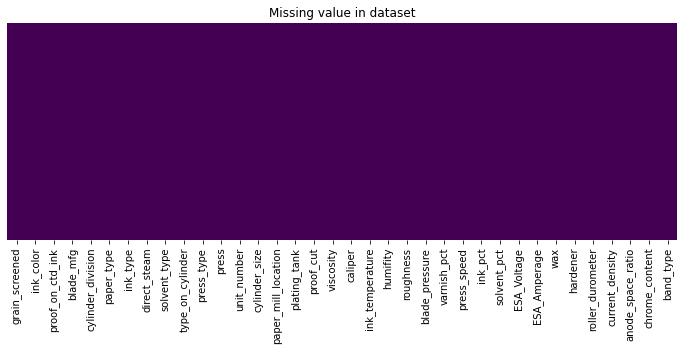

In [31]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in dataset')

<AxesSubplot:>

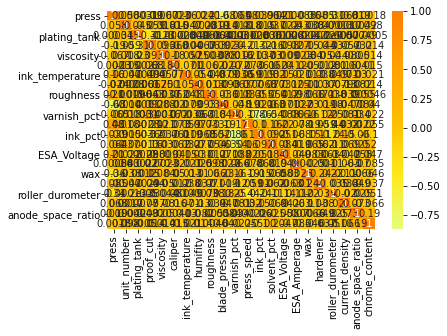

In [32]:
#correlation plot
corr = df.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

In [33]:
numerical = [var for var in df.columns if df.dtypes[var] != 'O']
print("There are {} numerical variables\n".format(len(numerical)))
print("The numerical variables are :", numerical)

There are 22 numerical variables

The numerical variables are : ['press', 'unit_number', 'plating_tank', 'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 'ink_pct', 'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer', 'current_density', 'anode_space_ratio', 'chrome_content']


In [34]:
df[numerical].isnull().sum()

press                0
unit_number          0
plating_tank         0
proof_cut            0
viscosity            0
caliper              0
ink_temperature      0
humifity             0
roughness            0
blade_pressure       0
varnish_pct          0
press_speed          0
ink_pct              0
solvent_pct          0
ESA_Voltage          0
ESA_Amperage         0
wax                  0
hardener             0
roller_durometer     0
current_density      0
anode_space_ratio    0
chrome_content       0
dtype: int64

Text(0, 0.5, ' Unit Number ')

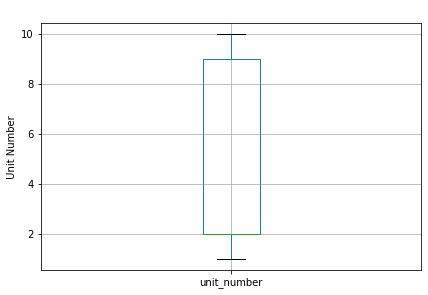

In [35]:
#draw boxplots
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column = 'unit_number')
fig.set_title(' ')
fig.set_ylabel(' Unit Number ')

Text(0, 0.5, ' Cylinder Band ')

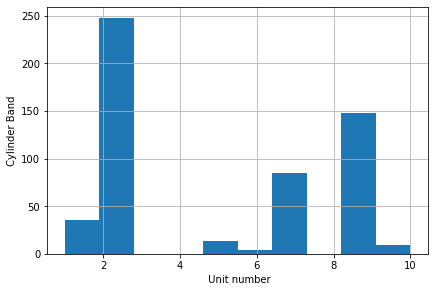

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.unit_number.hist(bins=10)
fig.set_xlabel(' Unit number')
fig.set_ylabel(' Cylinder Band ')

In [37]:
X = df.drop(['band_type'], axis = 1)
y = df['band_type']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
X_train.shape, X_test.shape

((432, 35), (109, 35))

In [41]:
#replace categorical values
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['grain_screened', 'ink_color', 'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type', 'type_on_cylinder', 'press_type', 'cylinder_size', 'paper_mill_location'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.to_csv('xtrain.csv', index = False)

In [42]:
y_train.isnull().values.any()

False

In [43]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state = 0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [44]:
y_pred_gini = clf_gini.predict(X_test)

In [45]:
# check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index: 0.6606


In [46]:
# compare trainset and test set accuracy
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'band', 'noband',
       'noband', 'noband', 'noband', 'band', 'noband', 'band', 'band',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'band', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'band', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'band', 'noband', 'band', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'band', 'noband', 'noband', 'noband', 'band', 'noband',
       'noband', 'noband', 'band', 'noband', 'band', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband',

In [47]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

Training-set accuracy score: 0.7292


In [48]:
# Decision Tree Classifier with criterion entropy
clf_en = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [49]:
y_pred_en = clf_en.predict(X_test)

In [50]:
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy : {0:0.4f}'.
     format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with criterion entropy : 0.6606
